# Data Cleanser Project
Healthcare Patient Records


## 1. Load Libraries and Dataset

In [72]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy import stats
import matplotlib.pyplot as plt

In [66]:
# Load dataset
df = pd.read_csv("patient health.csv")

df.head()


,patient_id,age,gender,region,bmi,blood_pressure,cholesterol,glucose,disease_risk
0,1,69.0,Female,West,18.5,125.3,177.0,123.1,0
1,2,32.0,Male,East,28.3,113.5,185.9,160.2,1
2,3,89.0,Female,North,21.8,137.6,185.7,144.0,0
3,4,78.0,Male,North,20.8,134.0,190.2,94.4,0
4,5,38.0,Male,North,24.4,137.5,189.1,148.0,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patient_id      1000 non-null   int64  
 1   age             950 non-null    float64
 2   gender          944 non-null    object 
 3   region          949 non-null    object 
 4   bmi             950 non-null    float64
 5   blood_pressure  1000 non-null   float64
 6   cholesterol     950 non-null    float64
 7   glucose         950 non-null    float64
 8   disease_risk    1000 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 70.4+ KB


In [16]:
df.describe()

,patient_id,age,bmi,blood_pressure,cholesterol,glucose,disease_risk
count,1000.000000,950.000000,950.000000,1000.000000,950.000000,950.000000,1000.000000
mean,500.500000,53.060000,27.685474,121.178060,204.705116,114.205421,0.409000
std,288.819436,20.993239,7.213028,24.399666,51.897576,39.429166,0.491895
min,1.000000,18.000000,6.700000,53.200000,78.200000,11.100000,0.000000
25%,250.750000,35.000000,23.200000,105.200000,175.325000,90.300000,0.000000
50%,500.500000,53.000000,27.300000,120.200000,199.950000,111.900000,0.000000
75%,750.250000,71.000000,31.500000,134.400000,227.875000,133.675000,1.000000
max,1000.000000,89.000000,71.600000,273.060000,665.060000,485.000000,1.000000


In [67]:

# Percentage of missing values
missing_summary = df.isnull().mean() * 100
missing_summary


patient_id        0.0
age               5.0
gender            5.6
region            5.1
bmi               5.0
blood_pressure    0.0
cholesterol       5.0
glucose           5.0
disease_risk      0.0
dtype: float64

## Part A: Handling Missing Values

In [ ]:
#simple imputer(numerical)
df_simple_num = df.copy()

num_imputer = SimpleImputer(strategy="mean")

df_simple_num[["bmi"]] = num_imputer.fit_transform(df_simple_num[["bmi"]])



In [ ]:
#simple imputer(categorical)
df_simple_cat = df_simple_num.copy()

cat_imputer = SimpleImputer(strategy="most_frequent")

df_simple_cat[["region"]] = cat_imputer.fit_transform(df_simple_cat[["region"]])


In [ ]:
#most frequent imputation
df_gender = df_simple_cat.copy()

gender_imputer = SimpleImputer(strategy="most_frequent")

df_gender[["gender"]] = gender_imputer.fit_transform(df_gender[["gender"]])



In [ ]:
#missing indicator
df_indicator = df.copy()

for col in ["age", "bmi", "cholesterol", "glucose"]:
    df_indicator[col + "_missing"] = df_indicator[col].isnull().astype(int)


In [ ]:
#random sample imputation
def random_sample_imputation(df, column):
    random_samples = df[column].dropna().sample(
        df[column].isnull().sum(), 
        replace=True,
        random_state=42
    )
    random_samples.index = df[df[column].isnull()].index
    df.loc[df[column].isnull(), column] = random_samples


In [68]:
#missing indicator + random sample imputation
df_random = df_indicator.copy()

for col in ["age", "bmi", "cholesterol", "glucose"]:
    random_sample_imputation(df_random, col)

df_random.isnull().sum()


patient_id              0
age                     0
gender                 56
region                 51
bmi                     0
blood_pressure          0
cholesterol             0
glucose                 0
disease_risk            0
age_missing             0
bmi_missing             0
cholesterol_missing     0
glucose_missing         0
dtype: int64

In [ ]:
#knn imputer
df_knn = df.copy()

num_cols = ["age", "bmi", "blood_pressure", "cholesterol", "glucose"]


In [25]:
knn_imputer = KNNImputer(n_neighbors=5)

df_knn[num_cols] = knn_imputer.fit_transform(df_knn[num_cols])

df_knn.isnull().sum()


patient_id         0
age                0
gender            56
region            51
bmi                0
blood_pressure     0
cholesterol        0
glucose            0
disease_risk       0
dtype: int64

In [ ]:
#mice algorithm
df_mice = df.copy()

mice_imputer = IterativeImputer(
    max_iter=10,
    random_state=42
)

df_mice[num_cols] = mice_imputer.fit_transform(df_mice[num_cols])

df_mice.isnull().sum()


patient_id         0
age                0
gender            56
region            51
bmi                0
blood_pressure     0
cholesterol        0
glucose            0
disease_risk       0
dtype: int64

In [27]:
comparison = pd.DataFrame({
    "Original": df.isnull().sum(),
    "Simple Imputer": df_gender.isnull().sum(),
    "Random Sampling": df_random.isnull().sum(),
    "KNN": df_knn.isnull().sum(),
    "MICE": df_mice.isnull().sum()
})

comparison


,Original,Simple Imputer,Random Sampling,KNN,MICE
age,50.0,50.0,0,0.0,0.0
age_missing,NaN,NaN,0,NaN,NaN
blood_pressure,0.0,0.0,0,0.0,0.0
bmi,50.0,0.0,0,0.0,0.0
bmi_missing,NaN,NaN,0,NaN,NaN
cholesterol,50.0,50.0,0,0.0,0.0
cholesterol_missing,NaN,NaN,0,NaN,NaN
disease_risk,0.0,0.0,0,0.0,0.0
gender,56.0,0.0,56,56.0,56.0
glucose,50.0,50.0,0,0.0,0.0


## Part B: Handling Outliers

In [ ]:
#remove outliers using
#Z score
from scipy.stats import zscore

df_zscore = df.copy()

cols = ["cholesterol", "glucose"]

z_scores = df_zscore[cols].apply(lambda x: zscore(x, nan_policy='omit'))


In [70]:
outlier_condition = (abs(z_scores) > 3).any(axis=1)


In [71]:
df_zscore_clean = df_zscore[~outlier_condition]

df.shape, df_zscore_clean.shape


((1000, 9), (971, 9))

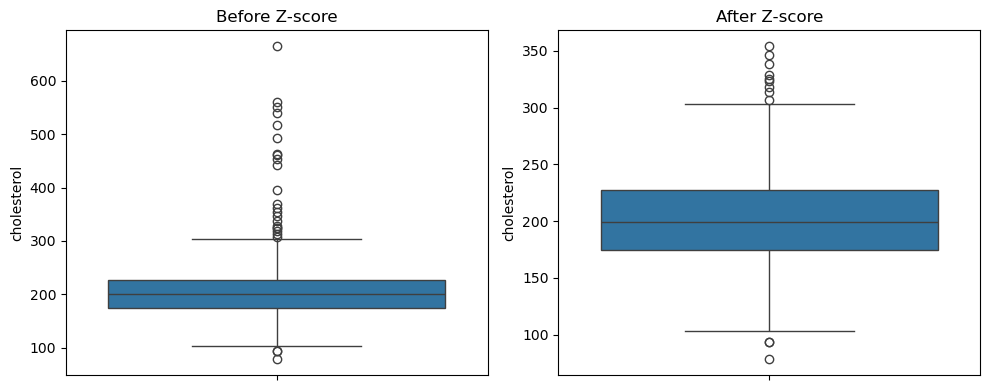

In [73]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.boxplot(y=df["cholesterol"])
plt.title("Before Z-score")

plt.subplot(1,2,2)
sns.boxplot(y=df_zscore_clean["cholesterol"])
plt.title("After Z-score")

plt.tight_layout()
plt.show()


In [ ]:
#IQR method
Q1 = df["bmi"].quantile(0.25)
Q3 = df["bmi"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound


(np.float64(10.749999999999998), np.float64(43.95))

In [74]:
df_iqr_clean = df[(df["bmi"] >= lower_bound) & (df["bmi"] <= upper_bound)]

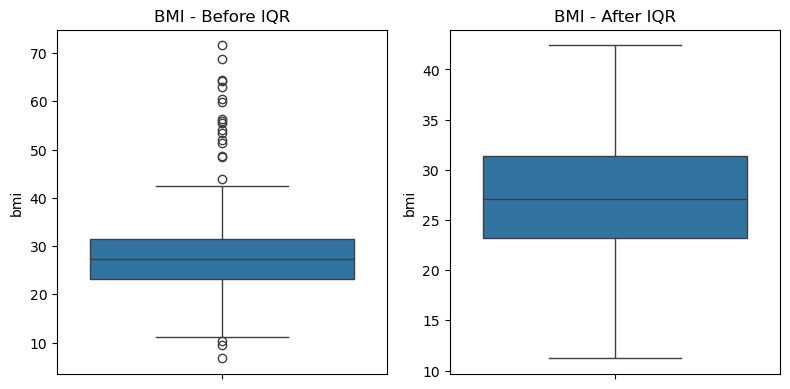

In [77]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
sns.boxplot(y=df["bmi"])
plt.title("BMI - Before IQR")

plt.subplot(1,2,2)
sns.boxplot(y=df_iqr_clean["bmi"])
plt.title("BMI - After IQR")

plt.tight_layout()
plt.show()


In [79]:
lower_p = df["blood_pressure"].quantile(0.01)
upper_p = df["blood_pressure"].quantile(0.99)

lower_p, upper_p


(np.float64(73.987), np.float64(199.88999999999993))

In [ ]:
#percentile method
df_percentile = df.copy()

df_percentile = df_percentile[
    (df_percentile["blood_pressure"] >= lower_p) &
    (df_percentile["blood_pressure"] <= upper_p)
]


In [ ]:
#winsorization
from scipy.stats.mstats import winsorize

df_winsor = df.copy()

for col in num_cols:
    df_winsor[col] = winsorize(df_winsor[col], limits=[0.01, 0.01])


ValueError: num must be an integer with 1 <= num <= 4, not 5

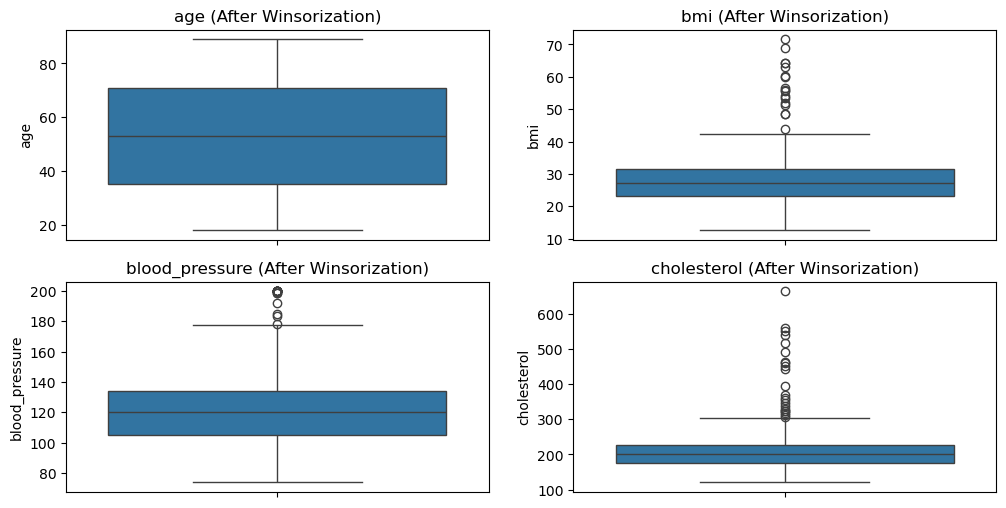

In [95]:
plt.figure(figsize=(12,6))
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=df_winsor[col])
    plt.title(f"{col} (After Winsorization)")

plt.tight_layout()
plt.show()


In [ ]:
comparison = pd.DataFrame({
    "Original": df.shape,
    "Z-score Cleaned": df_zscore_clean.shape,
    "IQR Cleaned": df_iqr_clean.shape,
    "Percentile Cleaned": df_percentile.shape,
    "Winsorized": df_winsor.shape
}, index=["Rows", "Columns"])

comparison


,Original,Z-score Cleaned,IQR Cleaned,Percentile Cleaned,Winsorized
Rows,1000,0,930,980,1000
Columns,9,9,9,9,9


In [ ]:
df_final = df_mice.copy()


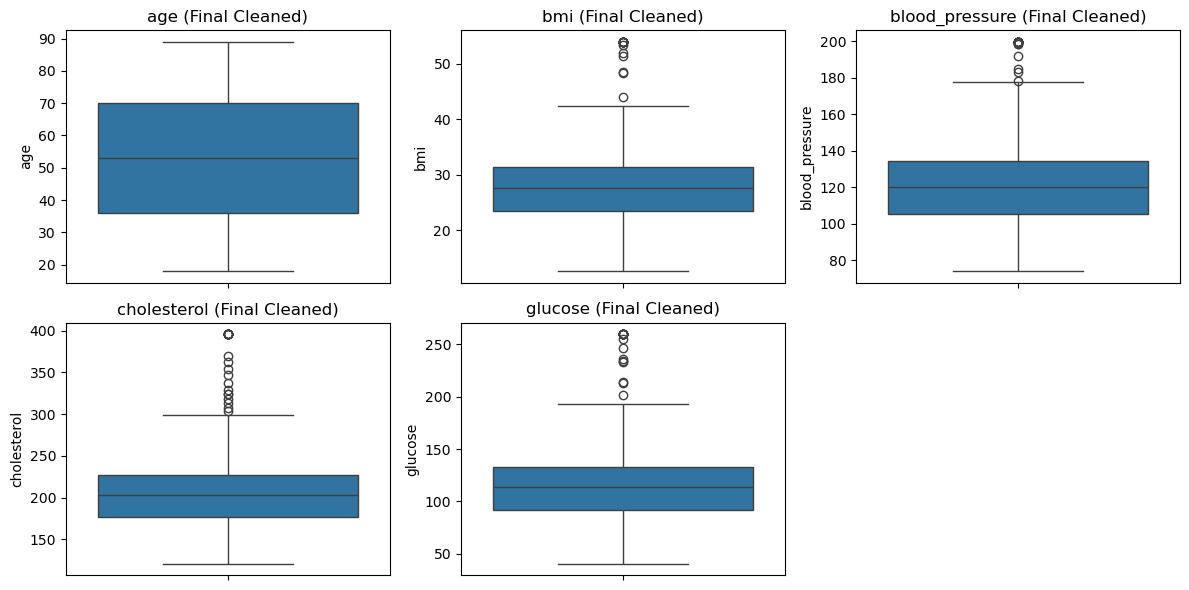

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df_final[col])
    plt.title(f"{col} (Final Cleaned)")

plt.tight_layout()
plt.show()


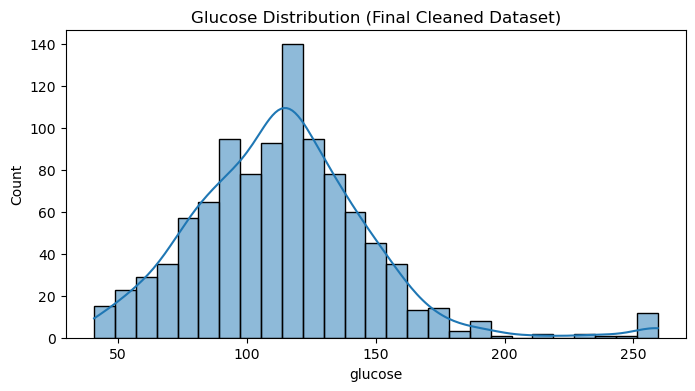

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df_final["glucose"], kde=True)
plt.title("Glucose Distribution (Final Cleaned Dataset)")
plt.show()


Observation:
- Age, BMI, Cholesterol, and Glucose have missing values.
- Gender and Region have categorical missing values.
- Disease_risk has no missing values and is used as target.


Missing indicator preserves information about missingness,
which may be predictive in healthcare data.


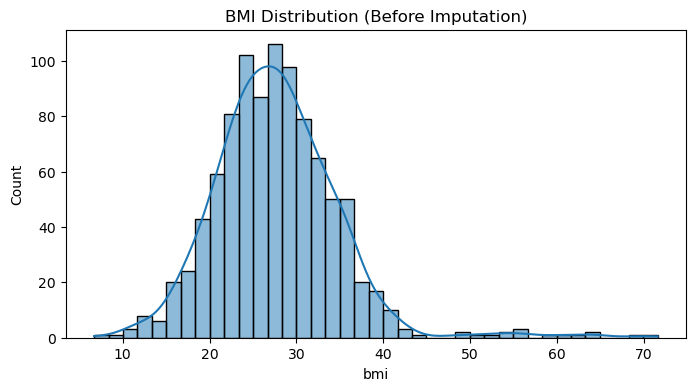

In [30]:
plt.figure(figsize=(8,4))
sns.histplot(df["bmi"], kde=True)
plt.title("BMI Distribution (Before Imputation)")
plt.show()


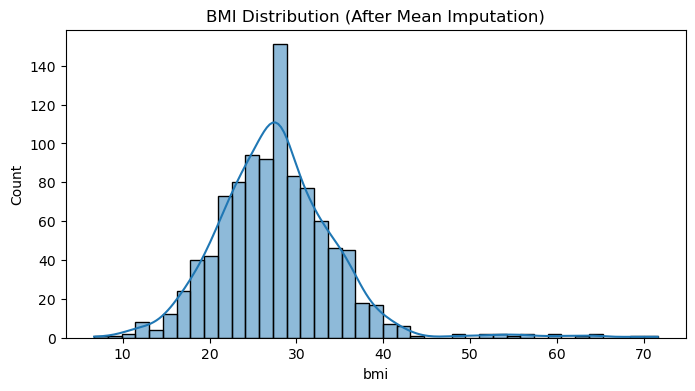

In [31]:
plt.figure(figsize=(8,4))
sns.histplot(df_simple_num["bmi"], kde=True)
plt.title("BMI Distribution (After Mean Imputation)")
plt.show()


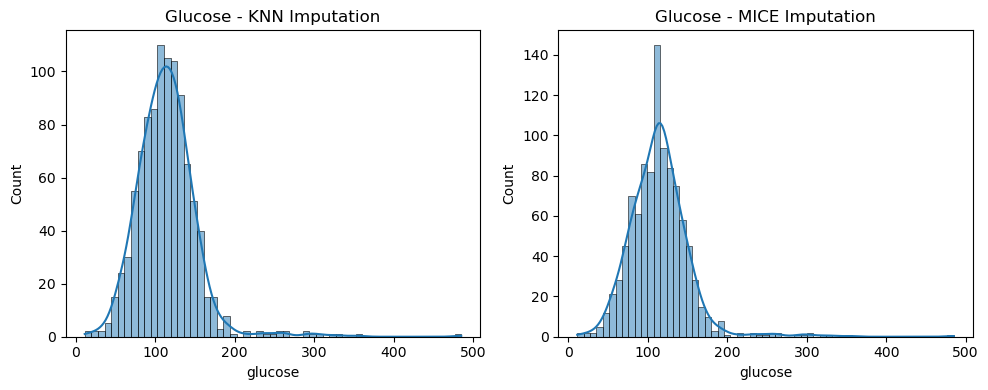

In [33]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(df_knn["glucose"], kde=True)
plt.title("Glucose - KNN Imputation")

plt.subplot(1,2,2)
sns.histplot(df_mice["glucose"], kde=True)
plt.title("Glucose - MICE Imputation")

plt.tight_layout()
plt.show()


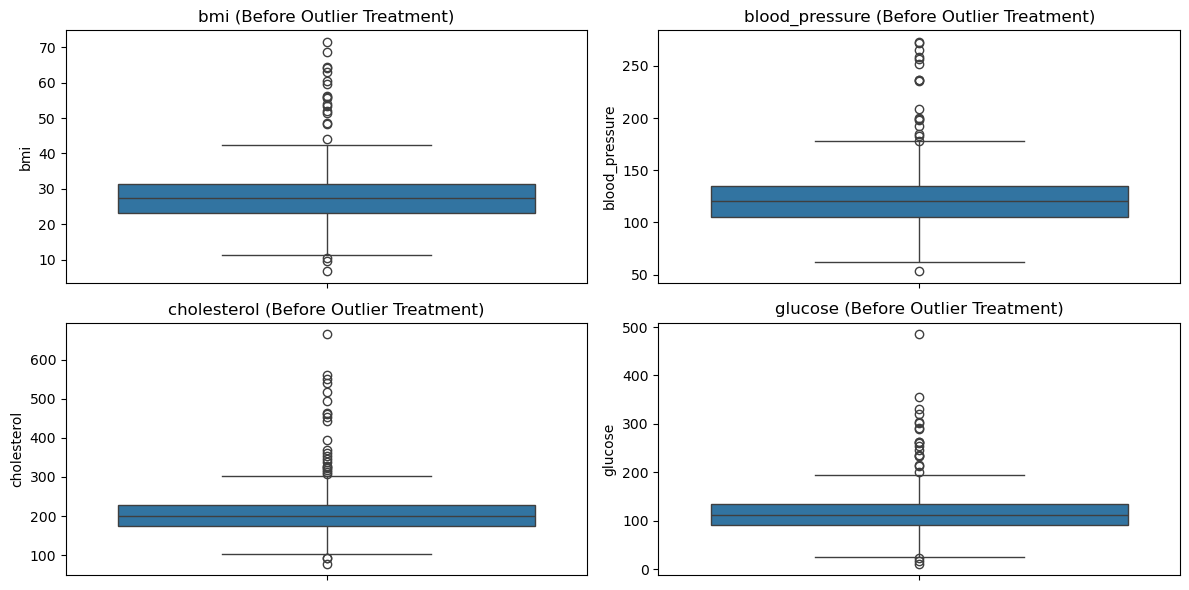

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=df[col])
    plt.title(f"{col} (Before Outlier Treatment)")

plt.tight_layout()
plt.show()


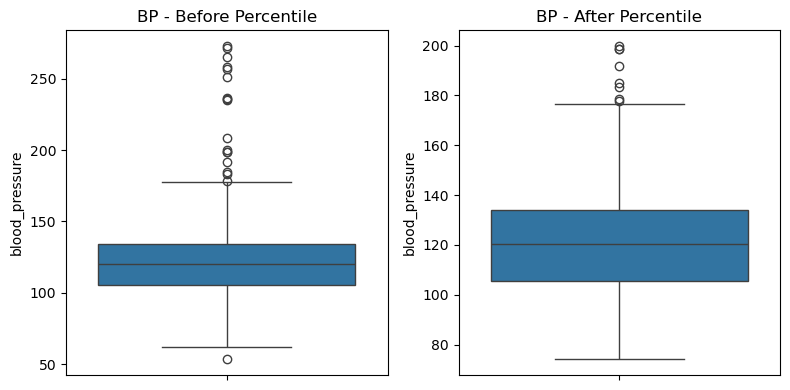

In [47]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
sns.boxplot(y=df["blood_pressure"])
plt.title("BP - Before Percentile")

plt.subplot(1,2,2)
sns.boxplot(y=df_percentile["blood_pressure"])
plt.title("BP - After Percentile")

plt.tight_layout()
plt.show()


## Part C: Final Clean Dataset & Report

In [ ]:
df_final.isnull().sum()


patient_id        0
age               0
gender            0
region            0
bmi               0
blood_pressure    0
cholesterol       0
glucose           0
disease_risk      0
dtype: int64

In [ ]:
comparison_stats = pd.concat(
    [
        df[num_cols].describe().T,
        df_final[num_cols].describe().T
    ],
    axis=1,
    keys=["Before Cleaning", "After Cleaning"]
)

comparison_stats


Before Cleaning                                                \
                         count        mean        std   min      25%     50%   
age                      950.0   53.060000  20.993239  18.0   35.000   53.00   
bmi                      950.0   27.685474   7.213028   6.7   23.200   27.30   
blood_pressure          1000.0  121.178060  24.399666  53.2  105.200  120.20   
cholesterol              950.0  204.705116  51.897576  78.2  175.325  199.95   
glucose                  950.0  114.205421  39.429166  11.1   90.300  111.90   

                                After Cleaning                                \
                    75%     max          count        mean        std    min   
age              71.000   89.00         1000.0   53.059998  20.461140   18.0   
bmi              31.500   71.60         1000.0   27.622755   6.611163   12.6   
blood_pressure  134.400  273.06         1000.0  120.745460  21.956596   74.0   
cholesterol     227.875  665.06         1000.0  203.675710  43.450542  120.8   
glucose         133.675  485.00         1000.0  113.710806  34.731142   40.6   

                                                      
                    25%         50%      75%     max  
age              36.000   53.056742   70.000   89.00  
bmi              23.475   27.621093   31.400   54.00  
blood_pressure  105.200  120.200000  134.400  199.80  
cholesterol     176.875  202.550000  226.525  395.78  
glucose          91.600  114.163012  132.450  259.50

Final Report:

1. Most effective imputation:
   - Median for BMI
   - MICE for multivariate medical attributes

2. Best outlier handling:
   - IQR for BMI
   - Winsorization for Cholesterol & Glucose

3. Data cleaning improved:
   - Reduced noise
   - Preserved sample size
   - Improved ML readiness
